#  División aleatoria y Validación cruzada (Train/Test)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

import pickle
data_text_tfidf = pickle.load(open("saved_feats/data_text_tfidf", "rb"))
data_sentiment = pickle.load(open("saved_feats/data_sentiment", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

## Splitter Function: train_test_split

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    data_text_tfidf, data_sentiment, test_size=0.2, random_state=42)

(array([20284.,     0.,     0.,     0.,     0.,  1002.,     0.,     0.,
            0.,   483.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

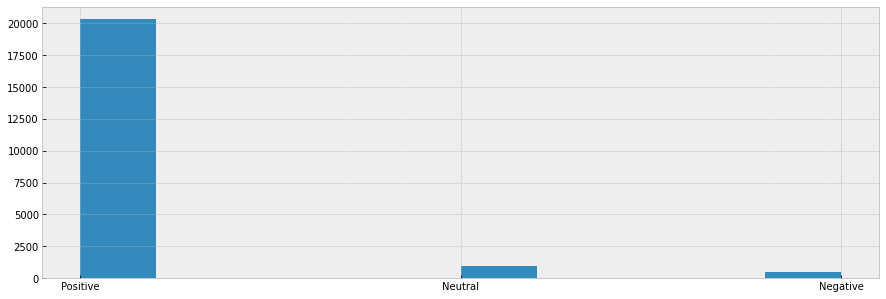

In [3]:
plt.figure(figsize=(15, 5))
plt.hist(y_train)

In [4]:
oversample = SMOTE(random_state=42)

X_train_smt, y_train_smt = oversample.fit_resample(
    X_train, y_train)

In [5]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

adaboost.fit(X_train_smt, y_train_smt)
predictedAda = adaboost.predict(X_test)

(array([20284.,     0.,     0.,     0.,     0.,  1002.,     0.,     0.,
            0.,   483.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

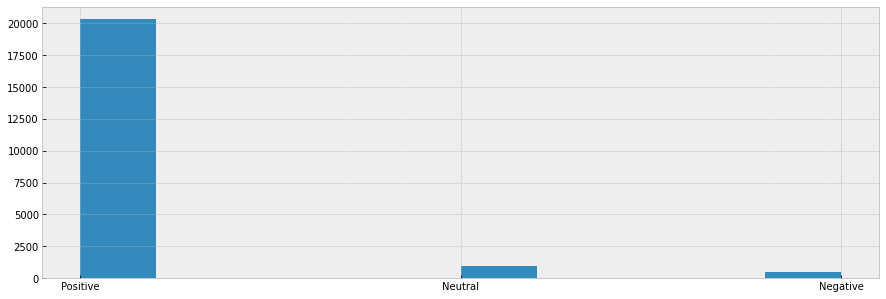

In [6]:
plt.figure(figsize=(15, 5))
plt.hist(y_train)

## Splitter Class: StratifiedShuffleSplit

In [10]:
SSsplit = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
for train_index, test_index in SSsplit.split(data_text_tfidf,
                                           data_sentiment):
    ShuffleSplit_X_train, ShuffleSplit_X_test = data_text_tfidf[
        train_index], data_text_tfidf[test_index]
    ShuffleSplit_y_train, ShuffleSplit_y_test = data_sentiment[
        train_index], data_sentiment[test_index]
    # Balanceo SMOTE
    ShuffleSplit_X_train_smt, ShuffleSplit_y_train_smt = oversample.fit_resample(
    ShuffleSplit_X_train, ShuffleSplit_y_train)
    # Adaboost
    adaboost.fit(ShuffleSplit_X_train_smt, ShuffleSplit_y_train_smt)
    predictedAda = adaboost.predict(ShuffleSplit_X_test)
    print([train_index])
    print("ShuffleSplit_X_test: " , [test_index] , ShuffleSplit_X_train)
    print("ShuffleSplit_y_train: " , [train_index] , ShuffleSplit_y_train)
    print("ShuffleSplit_y_test: " , [test_index] , ShuffleSplit_y_test)
    print("SMOTE X_TRAIN: " , [train_index] , ShuffleSplit_X_train_smt)
    print("SMOTE Y_TRAIN: " , [train_index] , ShuffleSplit_y_train_smt)
    print("PREDICCION ADA: " , predictedAda)

[array([19346,  3050, 24708, ...,  5300, 11619, 19536])]
ShuffleSplit_X_test:  [array([23992, 15879,  7887, ..., 16442,  5753, 23780])]   (0, 11283)	0.105427941771003
  (0, 11265)	0.25485939947378544
  (0, 10622)	0.14160225863573844
  (0, 10028)	0.23454255871095536
  (0, 9957)	0.13187280817575134
  (0, 9784)	0.11078860424656158
  (0, 9273)	0.15298574403236198
  (0, 9142)	0.24394633101431
  (0, 9138)	0.20440886509329215
  (0, 8226)	0.08296239062859384
  (0, 8215)	0.1630336043504293
  (0, 7846)	0.15726021836826964
  (0, 7368)	0.14625632501616417
  (0, 7336)	0.25672750881137324
  (0, 7277)	0.14860465792468647
  (0, 7001)	0.1618224329209515
  (0, 6211)	0.06381344543015041
  (0, 6104)	0.1883330101594093
  (0, 6061)	0.07788602358451979
  (0, 5902)	0.14037050602784185
  (0, 5795)	0.1400310698918641
  (0, 5729)	0.16750744930259753
  (0, 4216)	0.17173595225340166
  (0, 3944)	0.23454255871095536
  (0, 3852)	0.2457458704066301
  :	:
  (21765, 9957)	0.3744649816767535
  (21765, 5712)	0.23431767279

[array([24509, 19292, 19339, ..., 19291, 19248, 11472])]
ShuffleSplit_X_test:  [array([10207,  6554, 12433, ..., 12421, 21246, 20495])]   (0, 9082)	0.34627124403566595
  (0, 8119)	0.2815836033433126
  (0, 6758)	0.20769428536359502
  (0, 4969)	0.3452932326995742
  (0, 4924)	0.4992653584682899
  (0, 4833)	0.3213463707567111
  (0, 3783)	0.3612159756961454
  (0, 793)	0.3278727149187577
  (0, 639)	0.21894218577075686
  (1, 10902)	0.1241622180061329
  (1, 8048)	0.2016151192829524
  (1, 7094)	0.17189586029303344
  (1, 6876)	0.19715040480302243
  (1, 6134)	0.3405950786053063
  (1, 6003)	0.2607068631445787
  (1, 5963)	0.33493113676936986
  (1, 5795)	0.1427261040531464
  (1, 5530)	0.33126435105336666
  (1, 3393)	0.13346532830894003
  (1, 3386)	0.24206916386622174
  (1, 2459)	0.2541958891461455
  (1, 2124)	0.36770163757049185
  (1, 1501)	0.16964692833676911
  (1, 613)	0.3798016144259436
  (2, 10953)	0.18073628810720815
  :	:
  (21765, 2449)	0.20579577880230357
  (21765, 2368)	0.2938104198846652
 

[array([17199, 21541, 25139, ...,  8557, 20941,  3656])]
ShuffleSplit_X_test:  [array([17280, 23417, 13998, ..., 20319, 18681, 23651])]   (0, 10389)	0.12759296565445136
  (0, 9588)	0.20433627019733916
  (0, 9304)	0.2598137543408434
  (0, 8226)	0.23799053720602123
  (0, 8215)	0.11692182080340031
  (0, 7523)	0.16415994164557132
  (0, 7336)	0.1841157097651305
  (0, 7221)	0.23513266725149295
  (0, 7137)	0.2232676150116006
  (0, 6211)	0.27458820877422246
  (0, 6197)	0.1435671507273982
  (0, 6061)	0.11171409390011015
  (0, 5876)	0.3364109274236396
  (0, 5712)	0.11835797459888053
  (0, 5557)	0.15042266633705695
  (0, 5248)	0.28516689922899124
  (0, 5017)	0.18457455468946007
  (0, 4870)	0.15977268086051014
  (0, 3564)	0.15724094445449305
  (0, 3190)	0.3364109274236396
  (0, 2076)	0.2229000341489017
  (0, 1485)	0.15977268086051014
  (0, 712)	0.16077406605877398
  (1, 9549)	0.33746182770259886
  (1, 9522)	0.5728915801763056
  :	:
  (21766, 6835)	0.34066213827833786
  (21766, 4569)	0.234651740991

[array([ 9105, 22781, 23629, ...,  3503, 11530, 12986])]
ShuffleSplit_X_test:  [array([24752,  4495, 14359, ..., 15667, 23599, 18782])]   (0, 11392)	0.280294678009317
  (0, 11121)	0.3443736982715165
  (0, 7835)	0.38339574557073564
  (0, 4686)	0.16899520734422296
  (0, 4347)	0.523493410629423
  (0, 3933)	0.3686227403238838
  (0, 3847)	0.4662208660442811
  (1, 11188)	0.2663658157807327
  (1, 10910)	0.309695272339108
  (1, 9851)	0.3303728512349631
  (1, 9071)	0.38721952433426793
  (1, 6884)	0.2908330517333742
  (1, 6758)	0.20350681290421618
  (1, 6061)	0.18825845889613374
  (1, 5029)	0.23987561068188695
  (1, 2497)	0.32079701881977285
  (1, 1061)	0.3454114010616428
  (1, 621)	0.3644896480334376
  (2, 11400)	0.4354719791618492
  (2, 10745)	0.30709057519830835
  (2, 8894)	0.26556161133951134
  (2, 6061)	0.17198023060347106
  (2, 4600)	0.19575621493713063
  (2, 4569)	0.15399566727137723
  (2, 3984)	0.2977072460543427
  :	:
  (21765, 6118)	0.36687411562969846
  (21765, 4686)	0.194810544868513

[array([ 3786,  8890, 19063, ..., 26221,  4337, 13327])]
ShuffleSplit_X_test:  [array([13856,  7955, 26610, ...,  6741, 16091, 11138])]   (0, 11326)	0.2640196697448809
  (0, 11177)	0.25485046528000294
  (0, 10918)	0.1305150985703178
  (0, 10459)	0.1787553509848489
  (0, 10389)	0.09945344856135022
  (0, 10316)	0.11626728994902577
  (0, 9865)	0.1787553509848489
  (0, 9483)	0.22035758933642538
  (0, 8940)	0.09766559670889371
  (0, 7624)	0.12353074702724735
  (0, 6218)	0.17761017420558578
  (0, 6148)	0.17612735553394493
  (0, 6131)	0.1606102675433549
  (0, 6118)	0.10785521746272834
  (0, 5763)	0.09071505850331112
  (0, 5730)	0.14881269059975
  (0, 5712)	0.09225515433565519
  (0, 4600)	0.0991147099851207
  (0, 4311)	0.13144613304743685
  (0, 4172)	0.24424563256009757
  (0, 4058)	0.21575942590086714
  (0, 3945)	0.21575942590086714
  (0, 3592)	0.17520669328066296
  (0, 3254)	0.12415457654034845
  (0, 3223)	0.1116955581793268
  :	:
  (21766, 9972)	0.34028216634854425
  (21766, 7669)	0.19982015

(array([20292.,     0.,     0.,     0.,     0., 20292.,     0.,     0.,
            0., 20292.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

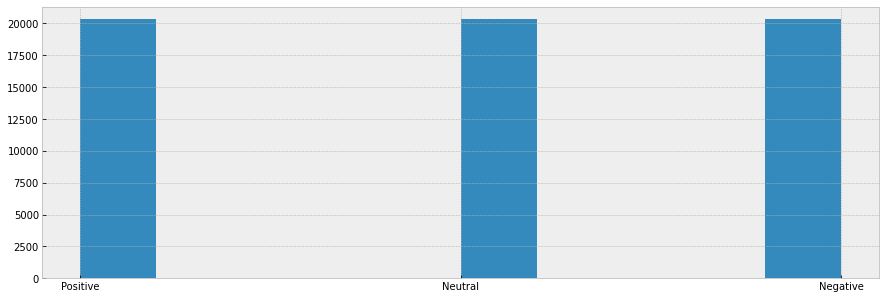

In [11]:
plt.figure(figsize=(15, 5))
plt.hist(ShuffleSplit_y_train_smt)

### Almacenamiento de features

In [ ]:
pickle.dump(X_train_smt, open("saved_feats/X_train_smt", "wb"))
pickle.dump(X_test, open("saved_feats/X_test", "wb"))
pickle.dump(y_train_smt, open("saved_feats/y_train_smt", "wb"))
pickle.dump(y_test, open(
    "saved_feats/y_test", "wb"))
pickle.dump(ShuffleSplit_X_train_smt, open(
    "saved_feats/ShuffleSplit_X_train_smt", "wb"))
pickle.dump(ShuffleSplit_X_test, open("saved_feats/ShuffleSplit_X_test", "wb"))
pickle.dump(ShuffleSplit_y_train_smt, open(
    "saved_feats/ShuffleSplit_y_train_smt", "wb"))
pickle.dump(ShuffleSplit_y_test, open(
    "saved_feats/ShuffleSplit_y_test", "wb"))